## Flight Delays: 
* Missing a flight could mean that you may not be be able to meet loved ones for holidays or be absent at critical business meetings.  [A study estimated](http://www.isr.umd.edu/NEXTOR/pubs/TDI_Report_Final_10_18_10_V3.pdf) that it costs the US economy \$34 billion.
* The Federal Aviation Authority imposed a fine of \$27,500 per passenger for more than four hour delay.
* Most importantly, I'd just would like to know if my flight will be delayed


Thanks to Sudaksh for ideas



## Approach
* The purpose of this exercise to demonstrate the power of statistical techniques
* As a result, we will start at exploratory analysis and continue to try to simulate the airline network

## Background
* Southwest Airlines is a great candidate for this exercise because almost all their airplanes are Boeing 737. As a result, the no. of seats, the time take to turn-around the aricraft, crew size, average haul duration all tend to be consistent. 

* Another reason for choosing Southwest, is that their operations team is great. Since 1982, [Southwest has pushed](https://www.youtube.com/watch?v=gnFfFRDMd_0) to turn around aircrafts within 10 minutes of landing. This has a critical impact on data processing because flights can be chained together with little loss in accuracy. 

* Also, I love Southwest. 

Always open to feedback, so feel free to send them my way
PS: Southwest is the largest operator of Boeing 737s in the world!


## Background (Continued)
* FAA considers a flight that arrives more than 15 minutes after ETA as a 
delayed flight
* Data is available at [Bureau of Transportation Statistic's](http://www.transtats.bts.gov/DL_SelectFields.asp?Table_ID=236&DB_Short_Name=On-Time) website
* A Layman's Anatomy of a flight: 
    * Push Back (Departure): The airplane pushes back from the gate
    * Taxi Out: The airplane taxis out for take off
    * Take Off (Wheels Up): The wheels are off the ground
    * Flight
    * Land (Wheels Down): The wheels are back on ground
    * Taxi In: Taxi to gate
    * Arrival: When the wheels stop at the gate

In [2]:
import sys
import os.path
import zipfile
import numpy as np
import pandas as pd
%matplotlib inline
def unzipFilesRename():
    filePref = "9078175_T_ONTIME "
    fileCount = 0
    for i in range(2013,2016):
        for j in range(1,13):
            j_str = str(j)
            if j < 10:
                j_str = "0" + j_str

            yrMon = str(i) + "-" + j_str 
            fname = filePref + yrMon + ".zip" 
            if os.path.isfile(fname):
                fh = open(fname, 'rb')
                z = zipfile.ZipFile(fh)
                for name in z.namelist():
                    outpath = "."
                    z.extract(name, outpath)
                    os.rename(filePref.strip() + ".csv",yrMon+".csv")
                fh.close()
                fileCount += 1

    return fileCount

def getDataset(startYear, endYear):
    frames = []
    for i in range(startYear,endYear + 1):
        for j in range(1,13):
            j_str = str(j)
            if j < 10:
                j_str = "0" + j_str

            yrMon = str(i) + "-" + j_str + ".csv"
            temp = pd.read_csv("data/"+yrMon)
            frames.append (temp)
    return pd.concat(frames)

dat = getDataset(2015,2015)
len(dat)
            
#dat.column_names

5819079

In [3]:
len(dat)


5819079

In [4]:
# The following columns need to be downloaded from the BTS website linked above. 

dat.columns.values

array(['YEAR', 'QUARTER', 'MONTH', 'DAY_OF_MONTH', 'DAY_OF_WEEK',
       'FL_DATE', 'UNIQUE_CARRIER', 'CARRIER', 'TAIL_NUM', 'FL_NUM',
       'ORIGIN_AIRPORT_ID', 'ORIGIN_AIRPORT_SEQ_ID',
       'ORIGIN_CITY_MARKET_ID', 'ORIGIN', 'DEST_AIRPORT_ID',
       'DEST_AIRPORT_SEQ_ID', 'DEST_CITY_MARKET_ID', 'DEST', 'DEP_TIME',
       'DEP_DELAY', 'DEP_DELAY_NEW', 'DEP_DEL15', 'DEP_TIME_BLK',
       'TAXI_OUT', 'WHEELS_OFF', 'WHEELS_ON', 'TAXI_IN', 'ARR_TIME',
       'ARR_DELAY', 'ARR_DELAY_NEW', 'ARR_DEL15', 'ARR_TIME_BLK',
       'CANCELLED', 'CANCELLATION_CODE', 'DIVERTED', 'Unnamed: 35'], dtype=object)

In [ ]:
dat['FLT_DELAY']  = dat.apply(lambda dat:dat['ARR_TIME'] - dat['DEP_TIME'], axis = 1) 


In [115]:
dat['TAXI_OUT_DELAY']  = dat.apply(lambda dat:dat['WHEELS_OFF'] - dat['DEP_TIME'], axis = 1) 

In [112]:
dat['TAXI_IN_DELAY']  = dat.apply(lambda dat:dat['ARR_TIME'] - dat['WHEELS_ON'], axis = 1) 

In [108]:
dat['AIR_DELAY']  = dat.apply(lambda dat:dat['WHEELS_ON'] - dat['WHEELS_OFF'], axis = 1) 

#### Facts about the data
* 2015 dataset consists of 5,819,079 flights
* The data includes flight details of 18 carriers


In [5]:

# print dat['CARRIER'].unique()

carrier_lookup = pd.read_csv("L_CARRIER_HISTORY.csv")
carrier_lookup.columns.values

#
df1 = pd.DataFrame({'Code': dat['CARRIER'].unique()})
result = pd.merge(df1, carrier_lookup, on='Code')
print result
barChDat = dat.groupby(['CARRIER']).size().reset_index(name='count')

#print barChDat.head()


   Code                                 Description
0    AA            American Airlines Inc. (1960 - )
1    AS              Alaska Airlines Inc. (1960 - )
2    B6                   JetBlue Airways (2000 - )
3    DL              Delta Air Lines Inc. (1960 - )
4    EV          ExpressJet Airlines Inc. (2012 - )
5    EV   Atlantic Southeast Airlines (1993 - 2011)
6    F9            Frontier Airlines Inc. (1994 - )
7    HA            Hawaiian Airlines Inc. (1960 - )
8    MQ                         Envoy Air (2014 - )
9    MQ              Simmons Airlines (1991 - 1998)
10   MQ  American Eagle Airlines Inc. (1998 - 2014)
11   NK                  Spirit Air Lines (1992 - )
12   OO             SkyWest Airlines Inc. (2003 - )
13   UA             United Air Lines Inc. (1960 - )
14   US                         USAir (1988 - 1997)
15   US               US Airways Inc. (1997 - 2015)
16   VX                    Virgin America (2007 - )
17   VX                 Aces Airlines (1992 - 2003)
18   WN     

#### 

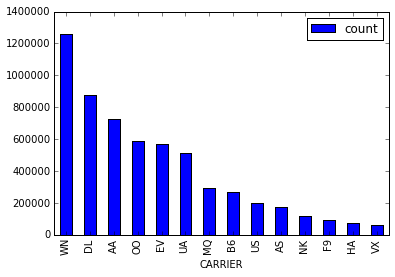

In [6]:
barChDat = dat.groupby(['CARRIER']).size().reset_index(name='count')
barChDat = barChDat.sort_values(by = ['count'], ascending=[0])

barChDat.plot(kind='bar', x = 'CARRIER')


In [7]:
barChDat

,CARRIER,count
13,WN,1261855
3,DL,875881
0,AA,725984
9,OO,588353
4,EV,571977
10,UA,515723
7,MQ,294632
2,B6,267048
11,US,198715
1,AS,172521


In [8]:
swDat = dat[dat['CARRIER'] =="WN"]

print "No. of Southwest Airline flights:", len(swDat)


No. of Southwest Airline flights: 1261855


In [9]:
barChDat = swDat.groupby(['ORIGIN']).size().reset_index(name='count')

#p = Bar(barChDat, 'ORIGIN', values='count', title="Total Flights from Origin")
#show(p)

In [10]:
print barChDat.sort(['count'], ascending=[0]).head()


   ORIGIN  count
48    MDW  83601
40    LAS  74890
12    BWI  69868
22    DEN  61018
62    PHX  58544


c:\python27\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


In [11]:
#sumDat =swDat.groupby( "ORIGIN" ).count()
#sumDat
#sumDat = pd.DataFrame(({'clt':sumDat})).reset_index()
#sumDat = sumDat.loc[sumDat['flt_count']>50000].sort_values(by=['flt_count'], ascending=False)

#sumDat = sumDat[['od','sum_arr_delay']]
#sumDat.columns.values
#sumDat.plot(kind='bar',x='ORIGIN')

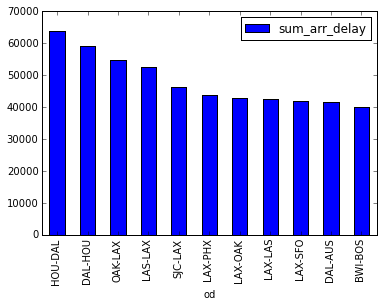

In [12]:
%matplotlib inline
sumDat = pd.DataFrame({'sum_arr_delay': swDat.groupby( [ "ORIGIN", "DEST"] )["ARR_DELAY"].sum()}).reset_index()
sumDat['od'] = sumDat['ORIGIN'] +'-' + sumDat['DEST']
sumDat = sumDat.loc[sumDat['sum_arr_delay']>40000].sort_values(by=['sum_arr_delay'], ascending=False)

sumDat = sumDat[['od','sum_arr_delay']]

sumDat.plot(kind='bar',x='od')

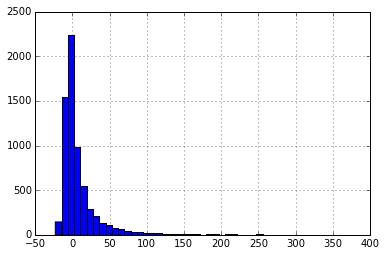

In [13]:

swDat_2_HOU_DAL = swDat.loc[(swDat['ORIGIN'] =="DAL") & (swDat['DEST'] =="HOU")]
swDat_2_HOU_DAL['ARR_DELAY'].hist(bins = 50)
#swDat_2_HOU_DAL.head()

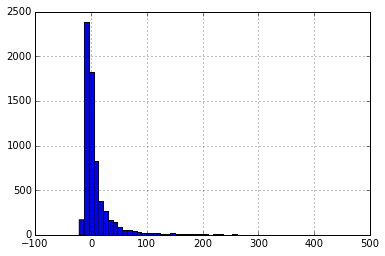

In [14]:
swDat_DAL_HOU = swDat_2_HOU_DAL = swDat.loc[(swDat['ORIGIN'] =="HOU") & (swDat['DEST'] =="DAL")]
swDat_DAL_HOU['ARR_DELAY'].hist(bins = 50)

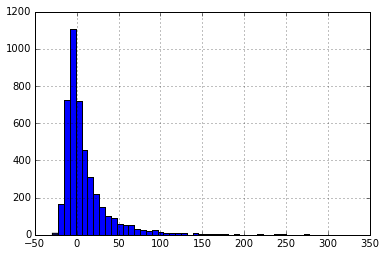

In [15]:
swDat_LAX_OAK = swDat.loc[(swDat['ORIGIN'] =="LAX") & (swDat['DEST'] =="OAK")]
swDat_LAX_OAK['ARR_DELAY'].hist(bins = 50)

#### Wow, that is a nice fat delay distribution
* Let us try fitting a distribution to the arrival delay for OAK LAX flight

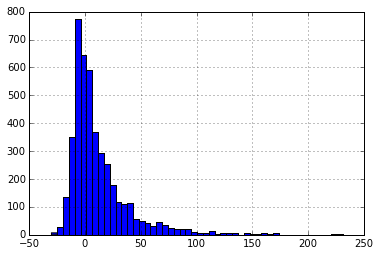

In [16]:

swDat_OAK_LAX = swDat.loc[(swDat['ORIGIN'] =="OAK") & (swDat['DEST'] =="LAX")]
swDat_OAK_LAX['ARR_DELAY'].hist(bins = 50)

-30.0 231.0
11.8452715862 28.6235268734


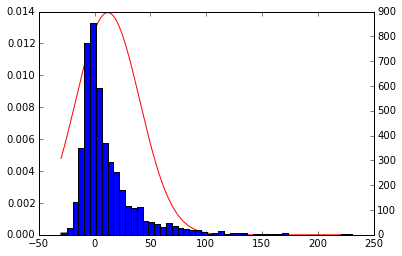

In [17]:
len(swDat_OAK_LAX[['ARR_DELAY']])
ad_OAK_LAX = swDat_OAK_LAX[['ARR_DELAY']]

from scipy import stats  
import numpy as np  
import matplotlib.pylab as plt

xt = ad_OAK_LAX['ARR_DELAY'] #plt.xticks()[0]  
xmin, xmax = min(ad_OAK_LAX['ARR_DELAY']), max(ad_OAK_LAX['ARR_DELAY'])  
lnspc = np.linspace(xmin, xmax, len(ad_OAK_LAX))
print xmin, xmax
#print xt
arr_list = ad_OAK_LAX['ARR_DELAY'].fillna(0).values.tolist()
m, s = stats.norm.fit(arr_list) # get mean and standard deviation  
pdf_g = stats.norm.pdf(lnspc, m, s) # now get theoretical values in our interval  
plt.plot(lnspc, pdf_g, label="Norm",color = 'r') # plot it
print m, s
#print arr_list

ax = plt.gca()
ax2 = ax.twinx()

ax2.hist(arr_list, 50)
plt.show()  

(array([   7.,   27.,  134.,  351.,  773.,  855.,  592.,  370.,  292.,
         252.,  179.,  116.,  110.,  113.,   55.,   50.,   42.,   32.,
          46.,   36.,   26.,   22.,   20.,   19.,   11.,    5.,    6.,
          14.,    4.,    8.,    7.,    7.,    1.,    5.,    4.,    3.,
           5.,    2.,    7.,    1.,    1.,    1.,    1.,    1.,    1.,
           1.,    1.,    1.,    2.,    2.]),
 array([ -30.  ,  -24.78,  -19.56,  -14.34,   -9.12,   -3.9 ,    1.32,
           6.54,   11.76,   16.98,   22.2 ,   27.42,   32.64,   37.86,
          43.08,   48.3 ,   53.52,   58.74,   63.96,   69.18,   74.4 ,
          79.62,   84.84,   90.06,   95.28,  100.5 ,  105.72,  110.94,
         116.16,  121.38,  126.6 ,  131.82,  137.04,  142.26,  147.48,
         152.7 ,  157.92,  163.14,  168.36,  173.58,  178.8 ,  184.02,
         189.24,  194.46,  199.68,  204.9 ,  210.12,  215.34,  220.56,
         225.78,  231.  ]),
 <a list of 50 Patch objects>)

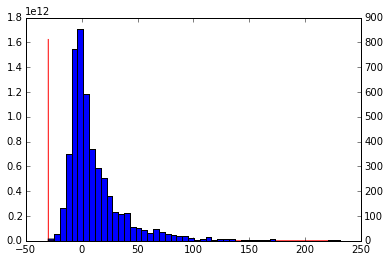

In [18]:

# exactly same as above
ag,bg,cg = stats.gamma.fit(arr_list)  
pdf_gamma = stats.gamma.pdf(lnspc, ag, bg,cg)  
plt.plot(lnspc, pdf_gamma, label="Gamma",color = 'r')
ax = plt.gca()
ax2 = ax.twinx()

ax2.hist(arr_list, 50)


c:\python27\lib\site-packages\scipy\optimize\minpack.py:236: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


(array([   7.,   27.,  134.,  351.,  773.,  855.,  592.,  370.,  292.,
         252.,  179.,  116.,  110.,  113.,   55.,   50.,   42.,   32.,
          46.,   36.,   26.,   22.,   20.,   19.,   11.,    5.,    6.,
          14.,    4.,    8.,    7.,    7.,    1.,    5.,    4.,    3.,
           5.,    2.,    7.,    1.,    1.,    1.,    1.,    1.,    1.,
           1.,    1.,    1.,    2.,    2.]),
 array([ -30.  ,  -24.78,  -19.56,  -14.34,   -9.12,   -3.9 ,    1.32,
           6.54,   11.76,   16.98,   22.2 ,   27.42,   32.64,   37.86,
          43.08,   48.3 ,   53.52,   58.74,   63.96,   69.18,   74.4 ,
          79.62,   84.84,   90.06,   95.28,  100.5 ,  105.72,  110.94,
         116.16,  121.38,  126.6 ,  131.82,  137.04,  142.26,  147.48,
         152.7 ,  157.92,  163.14,  168.36,  173.58,  178.8 ,  184.02,
         189.24,  194.46,  199.68,  204.9 ,  210.12,  215.34,  220.56,
         225.78,  231.  ]),
 <a list of 50 Patch objects>)

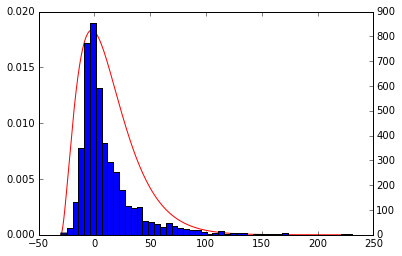

In [19]:
# guess what :) 
ab,bb,cb,db = stats.beta.fit(arr_list)  
pdf_beta = stats.beta.pdf(lnspc, ab, bb,cb, db)  
plt.plot(lnspc, pdf_beta, label="Beta",color = 'r')

ax = plt.gca()
ax2 = ax.twinx()

ax2.hist(arr_list, 50)

(array([   7.,   27.,  134.,  351.,  773.,  855.,  592.,  370.,  292.,
         252.,  179.,  116.,  110.,  113.,   55.,   50.,   42.,   32.,
          46.,   36.,   26.,   22.,   20.,   19.,   11.,    5.,    6.,
          14.,    4.,    8.,    7.,    7.,    1.,    5.,    4.,    3.,
           5.,    2.,    7.,    1.,    1.,    1.,    1.,    1.,    1.,
           1.,    1.,    1.,    2.,    2.]),
 array([ -30.  ,  -24.78,  -19.56,  -14.34,   -9.12,   -3.9 ,    1.32,
           6.54,   11.76,   16.98,   22.2 ,   27.42,   32.64,   37.86,
          43.08,   48.3 ,   53.52,   58.74,   63.96,   69.18,   74.4 ,
          79.62,   84.84,   90.06,   95.28,  100.5 ,  105.72,  110.94,
         116.16,  121.38,  126.6 ,  131.82,  137.04,  142.26,  147.48,
         152.7 ,  157.92,  163.14,  168.36,  173.58,  178.8 ,  184.02,
         189.24,  194.46,  199.68,  204.9 ,  210.12,  215.34,  220.56,
         225.78,  231.  ]),
 <a list of 50 Patch objects>)

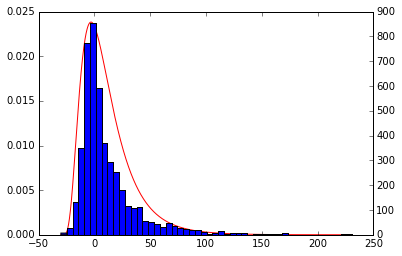

In [20]:
# guess what :) 
ab,bb,cb = stats.lognorm.fit(arr_list)  
pdf_lognormal = stats.lognorm.pdf(lnspc, ab,bb,cb)  
plt.plot(lnspc, pdf_lognormal, label="Lognormal",color = 'r')

ax = plt.gca()
ax2 = ax.twinx()

ax2.hist(arr_list, 50)

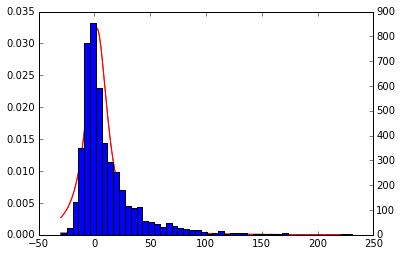

In [21]:
# guess what :) 
ab,bb,cb = stats.t.fit(arr_list)  
pdf_t = stats.t.pdf(lnspc, ab,bb,cb)  
plt.plot(lnspc, pdf_t, label="Lognormal", color = 'r')

ax = plt.gca()
ax2 = ax.twinx()

ax2.hist(arr_list, 50)
ax.plot(lnspc, pdf_t, label="Lognormal", color = 'r')

In [22]:
DEBUG_LEVEL = 0

def getParam (arr_list, dist):
    if dist == 'norm':
        distParam = stats.norm.fit(arr_list)
    elif dist == 'lognorm':
        distParam = stats.lognorm.fit(arr_list)
    elif dist == 'beta':
        distParam = stats.beta.fit(arr_list)
    elif dist == 'gamma':
        distParam = stats.gamma.fit(arr_list)
    elif dist == 't':
        distParam = stats.t.fit(arr_list)
    return distParam
# Just cause i am lazy, have created a function below that fits each distribution and selects the distribution 
# based on Kalmogorov-Smirnov Goodness of Fit test. 

def fitBestDistBasedOnKS(x):
    listOfDist = ['norm', 'lognorm', 'beta', 'gamma', 't']
    
    dStat = sys.maxint 
    pVal = sys.maxint
    selected_dist = ""
    dP = None
    for dist in listOfDist:
        distParam = getParam(x, dist)
        (temp_dStat, temp_pVal) = stats.kstest(x, dist, distParam)
        
        if DEBUG_LEVEL > 4:
            print dist, (temp_dStat, temp_pVal)
        
        if temp_pVal < 0.05 and temp_dStat < dStat:
            dStat = temp_dStat
            pVal = temp_pVal
            selected_dist = dist
            dP = distParam
            
    return (selected_dist, dStat, pVal, dP)

print fitBestDistBasedOnKS(arr_list)


('lognorm', 0.088869556072181166, 3.9925138616586594e-32, (0.52456573414818619, -30.809347303865493, 36.623026762324329))


#### Seasonality in the components of delay
1. Components of total Arrival Delay:
    - Departure delay (Ground Delay)
    - Taxi Out Delay
    - Flight Delay
    - Taxi In Delay
    - Not to forget, cascading delay from previous flight
2. Based on personal experience, we all know that delay get worse during summer, the holidays and winters. Hence, there seems to be seasonality. 
3. Also, delay is much worse at the morning and evening times at the airport. But, during the day, the operations staff have more resources to manage on-time performance. 
4. Also, the jet streams tend to change directions during seasons, this could impact the flight delay

#### How should we deal with them?
1. 
2. A set of simplifying assumptions
    * Let's carve out Departure Delay and Non-departure delay from total arrival delay. And, create Departure Delay distribution for every airport. And, create Non-departure delay distribution for each origin-destination pair. [This seems to have yileded decent results.]()
    * Let's create Departure Delay Distributions for each part of the day (0200-0400, 0400-0800, 0800-1200, 1200-1600, 1600-2000, 2000-0000). And, for each month of the year. This seperation should address (a) delay during the day and (b) seasonality during the year.
    * Let's create non-departure delay distribution and split it up in the same manner. 
    * 


In [23]:
swDat['ODPair'] = swDat['ORIGIN'] +'-' + swDat['DEST']

c:\python27\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [24]:
swDat.columns.values

#swDat = pd.DataFrame({'sum_arr_delay': swDat.groupby( [ "ORIGIN", "DEST"] )["ARR_DELAY"].sum()}).reset_index()



array(['YEAR', 'QUARTER', 'MONTH', 'DAY_OF_MONTH', 'DAY_OF_WEEK',
       'FL_DATE', 'UNIQUE_CARRIER', 'CARRIER', 'TAIL_NUM', 'FL_NUM',
       'ORIGIN_AIRPORT_ID', 'ORIGIN_AIRPORT_SEQ_ID',
       'ORIGIN_CITY_MARKET_ID', 'ORIGIN', 'DEST_AIRPORT_ID',
       'DEST_AIRPORT_SEQ_ID', 'DEST_CITY_MARKET_ID', 'DEST', 'DEP_TIME',
       'DEP_DELAY', 'DEP_DELAY_NEW', 'DEP_DEL15', 'DEP_TIME_BLK',
       'TAXI_OUT', 'WHEELS_OFF', 'WHEELS_ON', 'TAXI_IN', 'ARR_TIME',
       'ARR_DELAY', 'ARR_DELAY_NEW', 'ARR_DEL15', 'ARR_TIME_BLK',
       'CANCELLED', 'CANCELLATION_CODE', 'DIVERTED', 'Unnamed: 35',
       'ODPair'], dtype=object)

In [25]:
#sumDat.columns.values
import math
def arrivalDelayForAllODPairs(df):
    
    odPairList = df['ODPair'].unique()
    limit = len(odPairList)
    arrDelayDF = pd.DataFrame()
    i = 0
    modval = 10
        
    print "No. of distributions examined", limit
    for odPair in odPairList:
        
        tempDat = df.loc[(df['ODPair'] ==odPair)]
        
        origin = tempDat['ORIGIN'].unique()[0]
        dest = tempDat['DEST'].unique()[0]
        #print odPair, origin, dest, len(tempDat)
        
        arr_list = tempDat['ARR_DELAY'].fillna(0).values.tolist()
        
        opt = list(fitBestDistBasedOnKS(arr_list))
        #print odPair, opt
        
        params = None
        if opt!=None and opt[3]!=None:
            params = list(opt[3])

        datDict = {
            'ORIGIN': None
            , 'DEST': None
            , 'DIST': None
            , 'DStat': None
            , 'p1': None
            , 'p2': None
            , 'p3': None
            , 'p4': None
            , 'p5': None
            , 'len': None
        }
        datDict['ORIGIN'] = origin 
        datDict['DEST'] = dest 
        
        if opt != None and len(opt) > 0:
            datDict['DIST'] = opt[0]
        
        if opt != None and len(opt) > 1:
            datDict['DStat'] = opt[1]
        
        if opt != None and len(opt) > 2:
            datDict['pval'] = opt[2]
        
        if params != None and len(params) > 0:
            datDict['p1'] = params[0]
        
        if params != None and len(params) > 1:
            datDict['p2'] = params[1]
        
        if params != None and len(params) > 2:
            datDict['p3'] = params[2]
        
        if params != None and len(params) > 3:
            datDict['p4'] = params[3]
        
        if params != None and len(params) > 4:
            datDict['p5'] = params[4]
        
        datDict ['len'] = len(tempDat)
        #print datDict
        arrDelayDF = arrDelayDF.append(datDict, ignore_index=True)
        
        val = math.floor((i * 100.0 / limit))

        if val > 0.0 and val == modval:
            print "*", #i, val, i *1.0/limit, modval
            modval = modval + 10
        i +=1
        
    return arrDelayDF

distDF = arrivalDelayForAllODPairs(swDat)




No. of distributions examined 1334


c:\python27\lib\site-packages\scipy\optimize\minpack.py:236: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


* 134 10.0 0.100449775112 10
* 267 20.0 0.200149925037 20
* 401 30.0 0.30059970015 30
* 534 40.0 0.400299850075 40
* 667 50.0 0.5 50
* 801 60.0 0.600449775112 60
* 934 70.0 0.700149925037 70
* 1068 80.0 0.80059970015 80
* 1201 90.0 0.900299850075 90


In [30]:
#distDF
#print len(distDF)
temp = distDF.loc[(distDF['DIST'] =='')]
print 'Share of OD-Pair with no parametric fits', str(100.0*len(temp)/len(distDF)) + "%"

Share of OD-Pair with no parametric fits 2.47376311844%


In [27]:
swDat['ODPair'].unique()

array(['ATL-FLL', 'ATL-HOU', 'ATL-IND', ..., 'MEM-AUS', 'OKC-FLL',
       'DTW-MCO'], dtype=object)

('', 2147483647, 2147483647, None)


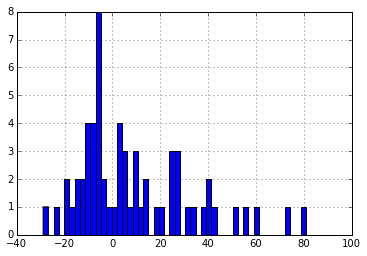

In [28]:
swDat_FLL_ATL = swDat.loc[(swDat['ORIGIN'] =="MDW") & (swDat['DEST'] =="GEG")]
swDat_FLL_ATL['ARR_DELAY'].hist(bins = 50)
arr_list = swDat_FLL_ATL['ARR_DELAY'].fillna(0).values.tolist()

print fitBestDistBasedOnKS(arr_list)
#ATL-PHX ['t', 0.19001017830334915, 0.0, (1.7034222193530859, -6.086542982948659, 11.168336608775524)]

('beta', 0.12337954330652356, 0.0, (2.2847948168701073, 11076757528.14045, -32.168965783049345, 183759930221.90131))


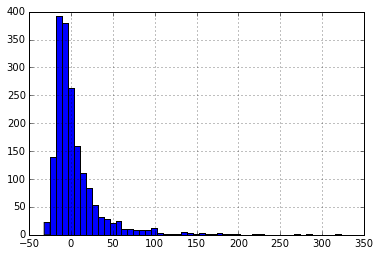

In [29]:
swDat_FLL_ATL = swDat.loc[(swDat['ORIGIN'] =="ATL") & (swDat['DEST'] =="FLL")].copy()
swDat_FLL_ATL['ARR_DELAY'].hist(bins = 50)
arr_list = swDat_FLL_ATL['ARR_DELAY'].fillna(0).values.tolist()

print fitBestDistBasedOnKS(arr_list)

('lognorm', 0.13368016918433934, 1.0463031140706266e-68, (0.74103569689246096, 97.555833162873483, 23.504533932528389))


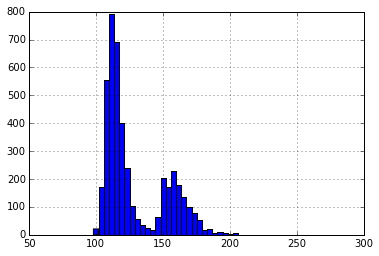

In [117]:
swDat_OAK_LAX_air = dat.loc[((dat['ORIGIN']=="OAK")&(dat['DEST']=="LAX")&(dat['CARRIER'] =="WN")& (dat['FLT_DELAY'] > -1000))].copy()

arr_list = swDat_OAK_LAX_air['FLT_DELAY'].fillna(0).values.tolist()
swDat_OAK_LAX_air['FLT_DELAY'].hist(bins = 50)
print fitBestDistBasedOnKS(arr_list)

('t', 0.090292298878228761, 1.3903170022030007e-31, (1.2935718689093783, 95.945033894799479, 2.6441245768255559))


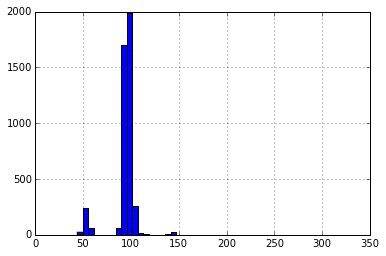

In [118]:
#
#np.subtract(swDat_OAK_LAX['ARR_TIME'], swDat_OAK_LAX['DEP_TIME'])
month = 5

swDat_OAK_LAX_air = dat.loc[((dat['ORIGIN']=="OAK")&(dat['DEST']=="LAX")&(dat['CARRIER'] =="WN")& (dat['AIR_DELAY'] > -1000))].copy()

arr_list = swDat_OAK_LAX_air['AIR_DELAY'].fillna(0).values.tolist()
swDat_OAK_LAX_air['AIR_DELAY'].hist(bins = 50)
print fitBestDistBasedOnKS(arr_list)

('lognorm', 0.1970372486824416, 4.1834614527446801e-149, (0.95531453765511742, 1.9443125634614562, 6.690566149760226))


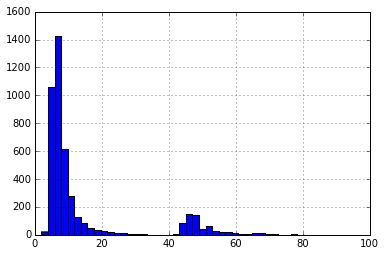

In [119]:

swDat_OAK_LAX_air = dat.loc[((dat['ORIGIN']=="OAK")&(dat['DEST']=="LAX")&(dat['CARRIER'] =="WN")& (dat['TAXI_IN_DELAY'] > -1000))].copy()

arr_list = swDat_OAK_LAX_air['TAXI_IN_DELAY'].fillna(0).values.tolist()
swDat_OAK_LAX_air['TAXI_IN_DELAY'].hist(bins = 50)
print fitBestDistBasedOnKS(arr_list)

('lognorm', 0.13752668685091307, 7.1277721968149097e-73, (1.0340136048575967, 3.8912361622101663, 9.8912478270124566))


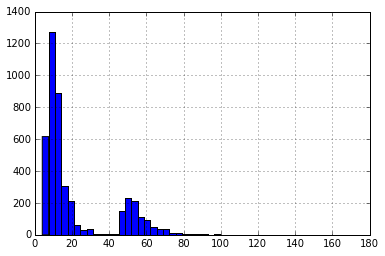

In [120]:

swDat_OAK_LAX_air = dat.loc[((dat['ORIGIN']=="OAK")&(dat['DEST']=="LAX")&(dat['CARRIER'] =="WN")& (dat['TAXI_OUT_DELAY'] > -1000))].copy()

arr_list = swDat_OAK_LAX_air['TAXI_OUT_DELAY'].fillna(0).values.tolist()
swDat_OAK_LAX_air['TAXI_OUT_DELAY'].hist(bins = 50)
print fitBestDistBasedOnKS(arr_list)

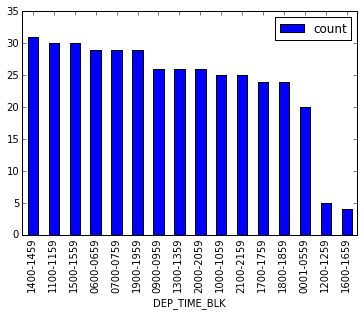

In [87]:
temp = swDat_OAK_LAX_tp_1.copy()
#temp['TAIL_NUM'].hist(bins = 50)

barChDat = swDat_OAK_LAX_tp_1.groupby(['DEP_TIME_BLK']).size().reset_index(name='count')
barChDat = barChDat.sort_values(by = ['count'], ascending=[0])

barChDat.plot(kind='bar', x = 'DEP_TIME_BLK')

#len(barChDat)

In [121]:
from sklearn.neighbors import KernelDensity
from scipy.stats import gaussian_kde
from statsmodels.nonparametric.kde import KDEUnivariate
from statsmodels.nonparametric.kernel_density import KDEMultivariate


def kde_scipy(x, x_grid, bandwidth=0.2, **kwargs):
    """Kernel Density Estimation with Scipy"""
    # Note that scipy weights its bandwidth by the covariance of the
    # input data.  To make the results comparable to the other methods,
    # we divide the bandwidth by the sample standard deviation here.
    kde = gaussian_kde(x, bw_method=bandwidth / x.std(ddof=1), **kwargs)
    return kde.evaluate(x_grid)


def kde_statsmodels_u(x, x_grid, bandwidth=0.2, **kwargs):
    """Univariate Kernel Density Estimation with Statsmodels"""
    kde = KDEUnivariate(x)
    kde.fit(bw=bandwidth, **kwargs)
    return kde.evaluate(x_grid)
    
    
def kde_statsmodels_m(x, x_grid, bandwidth=0.2, **kwargs):
    """Multivariate Kernel Density Estimation with Statsmodels"""
    kde = KDEMultivariate(x, bw=bandwidth * np.ones_like(x),
                          var_type='c', **kwargs)
    return kde.pdf(x_grid)


def kde_sklearn(x, x_grid, bandwidth=0.2, **kwargs):
    """Kernel Density Estimation with Scikit-learn"""
    kde_skl = KernelDensity(bandwidth=bandwidth, **kwargs)
    kde_skl.fit(x[:, np.newaxis])
    # score_samples() returns the log-likelihood of the samples
    log_pdf = kde_skl.score_samples(x_grid[:, np.newaxis])
    return np.exp(log_pdf)


kde_funcs = [kde_statsmodels_u, kde_statsmodels_m, kde_scipy, kde_sklearn]

kde_funcnames = ['Statsmodels-U', 'Statsmodels-M', 'Scipy', 'Scikit-learn']

In [ ]:

swDat_OAK_LAX_air = dat.loc[((dat['ORIGIN']=="OAK")&(dat['DEST']=="LAX")&(dat['CARRIER'] =="WN")& (dat['FLT_DELAY'] > -1000))].copy()

arr_list = swDat_OAK_LAX_air['FLT_DELAY'].fillna(0).values.tolist()

xmin, xmax = min(arr_list), max(arr_list)  
lnspc = np.linspace(xmin, xmax, len(arr_list))

#swDat_OAK_LAX_air['FLT_DELAY'].hist(bins = 50)
#print fitBestDistBasedOnKS(arr_list)

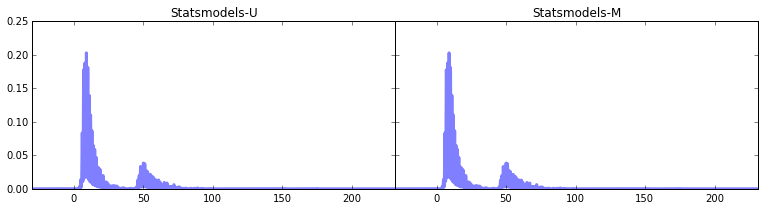

In [131]:
fig, ax = plt.subplots(1, 2, sharey=True,
                       figsize=(13, 3))
fig.subplots_adjust(wspace=0)

for i in range(0,2):
    pdf = kde_funcs[i](arr_list, lnspc, bandwidth=0.2)
    ax[i].plot(lnspc, pdf, color='blue', alpha=0.5, lw=3)
    #ax[i].fill(lnspc, pdf_true, ec='gray', fc='gray', alpha=0.4)
    ax[i].set_title(kde_funcnames[i])
    ax[i].set_xlim(xmin, xmax)
    #print pdf

(array([  6.16000000e+02,   1.27000000e+03,   8.90000000e+02,
          3.07000000e+02,   2.12000000e+02,   5.90000000e+01,
          3.20000000e+01,   3.80000000e+01,   8.00000000e+00,
          6.00000000e+00,   3.00000000e+00,   7.00000000e+00,
          1.47000000e+02,   2.32000000e+02,   2.14000000e+02,
          1.11000000e+02,   9.50000000e+01,   4.60000000e+01,
          3.70000000e+01,   3.60000000e+01,   1.40000000e+01,
          1.10000000e+01,   4.00000000e+00,   3.00000000e+00,
          5.00000000e+00,   2.00000000e+00,   1.00000000e+00,
          2.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   1.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
        

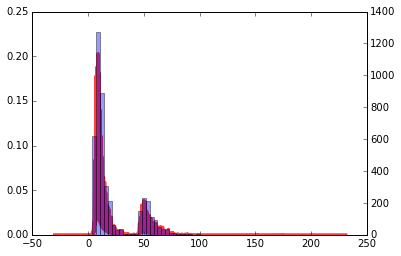

In [141]:
#fig, ax = plt.subplots(1, 2, sharey=True,
#                       figsize=(13, 3))
#fig.subplots_adjust(wspace=0)
ax = plt.gca()

for i in range(0,2):
    pdf = kde_funcs[i](arr_list, lnspc, bandwidth=0.2)
    ax.plot(lnspc, pdf, color='red', alpha=0.5, lw=3)
    #ax[i].fill(lnspc, pdf_true, ec='gray', fc='gray', alpha=0.4)
    #plt.set_title(kde_funcnames[i])
    #plt.set_xlim(xmin, xmax)
    #print pdf

ax2 = ax.twinx()

ax2.hist(arr_list, bins=50, alpha = 0.4)


In [84]:
#print_full(temp)

In [45]:
def print_full(x):
    pd.set_option('display.max_rows', len(x))
    print(x)
    pd.reset_option('display.max_rows')
#print_full(swDat_OAK_LAX['FLT_DELAY'])

1.02952305729 114.959784129 7.86116764008


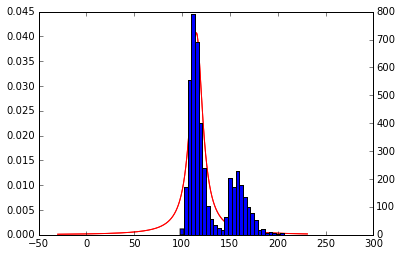

In [47]:
ab,bb,cb = stats.t.fit(arr_list)  
pdf_t = stats.t.pdf(lnspc, ab,bb,cb)  
plt.plot(lnspc, pdf_t, label="Lognormal", color = 'r')

ax = plt.gca()
ax2 = ax.twinx()

ax2.hist(arr_list, 50)
ax.plot(lnspc, pdf_t, label="Lognormal", color = 'r')

print ab,bb,cb

In [58]:

#table
#df

('lognorm', 0.16421384535484945, 1.017798909791373e-103, (0.74821004581002049, -12.085861216402499, 17.156190811196737))


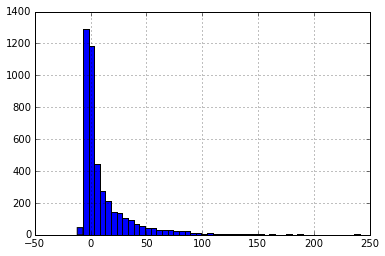

In [142]:
swDat_OAK_LAX_air = dat.loc[((dat['ORIGIN']=="OAK")&(dat['DEST']=="LAX")&(dat['CARRIER'] =="WN")& (dat['DEP_DELAY'] > -1000))].copy()

arr_list = swDat_OAK_LAX_air['DEP_DELAY'].fillna(0).values.tolist()
swDat_OAK_LAX_air['DEP_DELAY'].hist(bins = 50)
print fitBestDistBasedOnKS(arr_list)

In [59]:
def flightDelayForAllODPairs(df):
    
    #odPairList = df['ODPair'].unique()
    odPairList = ['LAX-OAK','OAK-LAX']
    
    limit = len(odPairList)
    outDF = pd.DataFrame()
    i = 0
    modval = 10
    monthsList = df['MONTH'].unique()
    print "No. of distributions examined", limit
    for odPair in odPairList:
        for month in monthsList:
        
            tempDat = df.loc[((df['ODPair'] ==odPair )&(df['MONTH'] == month))]

            origin = tempDat['ORIGIN'].unique()[0]
            dest = tempDat['DEST'].unique()[0]
            #print odPair, origin, dest, len(tempDat)

            arr_list = tempDat['FLT_DELAY'].fillna(0).values.tolist()

            opt = list(fitBestDistBasedOnKS(arr_list))
            #print odPair, opt

            params = None
            if opt!=None and opt[3]!=None:
                params = list(opt[3])

            datDict = {
                'ORIGIN': None
                , 'DEST': None
                , 'DIST': None
                , 'DStat': None
                , 'p1': None
                , 'p2': None
                , 'p3': None
                , 'p4': None
                , 'p5': None
                , 'len': None
                , 'month':None
            }
            datDict['ORIGIN'] = origin 
            datDict['DEST'] = dest 

            if opt != None and len(opt) > 0:
                datDict['DIST'] = opt[0]

            if opt != None and len(opt) > 1:
                datDict['DStat'] = opt[1]

            if opt != None and len(opt) > 2:
                datDict['pval'] = opt[2]

            if params != None and len(params) > 0:
                datDict['p1'] = params[0]

            if params != None and len(params) > 1:
                datDict['p2'] = params[1]

            if params != None and len(params) > 2:
                datDict['p3'] = params[2]

            if params != None and len(params) > 3:
                datDict['p4'] = params[3]

            if params != None and len(params) > 4:
                datDict['p5'] = params[4]

            datDict ['len'] = len(tempDat)
            datDict ['month'] = month
            #print datDict
            outDF = outDF.append(datDict, ignore_index=True)

            val = math.floor((i * 100.0 / limit))

            if val > 0.0 and val == modval:
                print "*", #i, val, i *1.0/limit, modval
                modval = modval + 10
            i +=1
        
    return outDF

distDF = flightDelayForAllODPairs(swDat)


No. of distributions examined 2


In [60]:
print_full(distDF)

   DEST  DIST     DStat ORIGIN    len  month         p1          p2  \
0   OAK     t  0.114410    LAX  389.0    1.0   0.876073  108.521875   
1   OAK     t  0.129482    LAX  358.0    2.0   0.829110  109.912457   
2   OAK     t  0.131238    LAX  398.0    3.0   0.736434  108.161050   
3   OAK     t  0.137804    LAX  390.0    4.0   0.623026  108.187990   
4   OAK     t  0.102111    LAX  390.0    5.0   0.637978  108.512172   
5   OAK     t  0.086603    LAX  396.0    6.0   0.531861  107.453779   
6   OAK     t  0.102864    LAX  405.0    7.0   0.563565  108.986373   
7   OAK     t  0.095686    LAX  391.0    8.0   0.640175  108.012359   
8   OAK     t  0.134398    LAX  363.0    9.0   0.729936  108.498967   
9   OAK     t  0.145652    LAX  390.0   10.0   0.750319  108.616044   
10  OAK     t  0.186764    LAX  375.0   11.0   0.687377  109.963157   
11  OAK     t  0.224485    LAX  381.0   12.0   0.782218  114.447468   
12  LAX     t  0.212975    OAK  390.0    1.0   0.906297  113.471593   
13  LA